Alek Turkmen

In [2]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Inputs

In [3]:
#Inputs (given by sidebo)
W_e = 100.0 #W
W_glass = 10.0 #lb

#Geometry
L = 0.508 #m
W = 0.254 #m
H = 0.3048 #m

#Fixed Temp
T_intial = 15.0 #oC
T_inf = 21.0 #oC
T_set = 27.0 #oC

#Thermal Prop
rho_glass = 2520.0 #kg/m^3
c_glass = 720.0 #J/kg/K
rho_H2O = 999.0 #kg/m^3
c_H2O = 4200.0 #J/kg/K

#Heat Transfer Coefficients
U_surface = 13.0 #W/m^2/K
U_sides = 8.5 #W/m^2/K
U_floor = 3.0 #W/m^2/K

# Derived Parameters

In [32]:
M_glass = W_glass*0.453592
A_glass = 2.0*W*H+2.0*L*H+W*L
t_glass = (M_glass)/(rho_glass*A_glass)
M_H2O = L*W*H*rho_H2O
Asurf = L*W
Afloor = Asurf
Asides = 2.0*W*H+2.0*L*H

#Capacitance
C_glass = c_glass*M_glass
C_H2O = c_H2O*M_H2O
C_lump = C_glass+C_H2O

#Resitances
R_surface = 1/(U_surface*Asurf)
R_side = 1/(U_sides*Asides)
R_floor = 1/(U_floor*Asurf)
R_equiv = 1/((1/R_surface)+(1/R_side)+(1/R_floor))

#Time Constant
tau = (C_lump*R_equiv)/3600

#Stead-State
T_ss = T_inf+(R_equiv*W_e)

#Target
q_target = (T_set-T_ss)/(T_intial-T_ss)

#Results
time_to_target_s = -math.log(q_target)*tau
time_to_target_h = time_to_target_s/3600
W_e_reset = (T_set-T_inf)/R_equiv

# Simulation

In [55]:
#time step betweeen points
t_sim = np.array([0, 0.2936875728, 0.5873751456, 0.8810627184, 1.174750291, 1.468437864, 1.762125437, 2.05581301, 2.349500583, 2.643188155, 2.936875728, 3.230563301, 3.524250874, 3.817938447, 4.111626019, 4.405313592, 4.699001165, 4.992688738, 5.286376311, 5.580063884, 5.873751456])

q_sim = np.exp(-t_sim/tau)

ToC_sim = (q_sim*(T_intial-T_ss)+T_ss)

dT_sim_temp = ToC_sim[1:] - ToC_sim[:-1]

dT_sim = np.insert(dT_sim_temp, 0, 0)

Q_top_sim = dT_sim/R_surface

Q_side_sim = dT_sim/R_side

Q_floor_sim = dT_sim/R_floor

Q_net_sim = Q_top_sim + Q_side_sim + Q_floor_sim

# Graphing

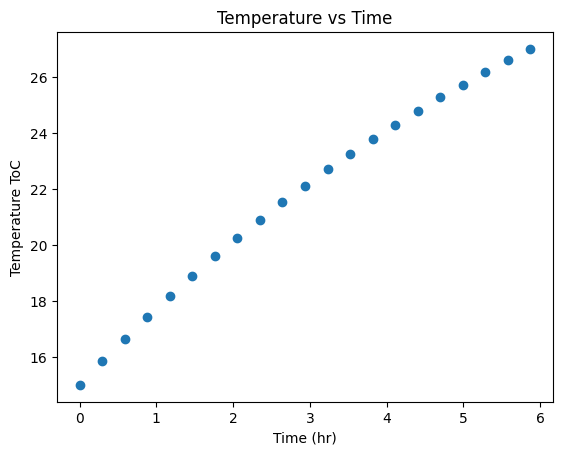

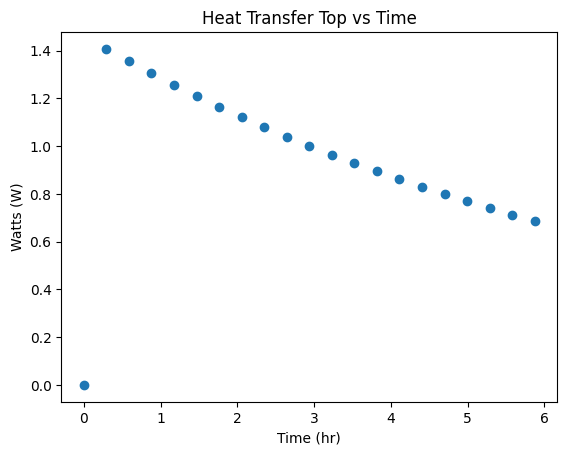

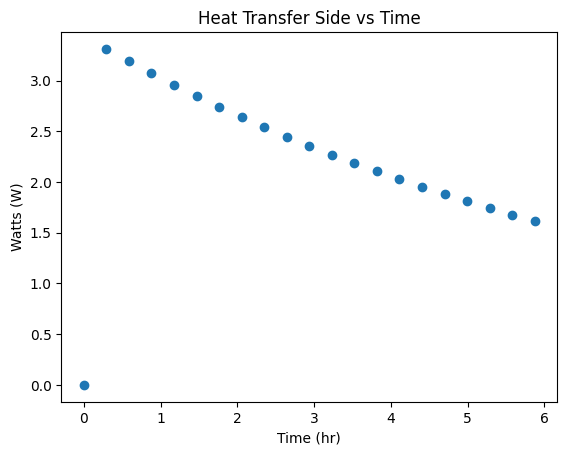

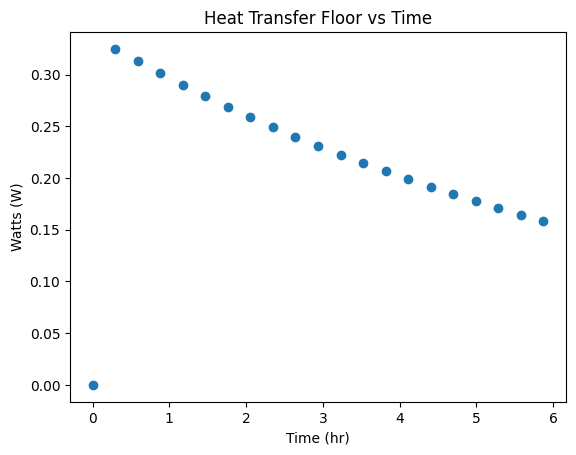

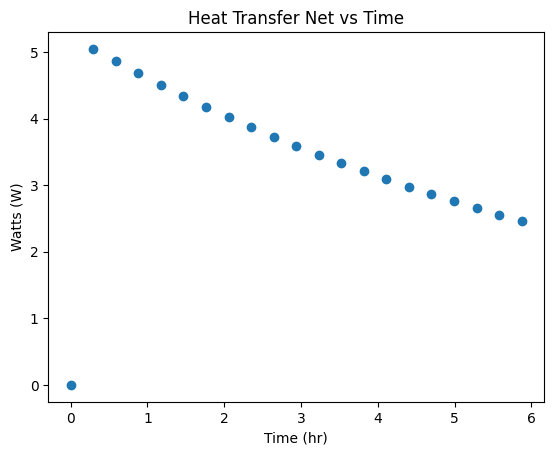

In [56]:
# Temperature vs Time
fig,ax = plt.subplots()
ax.scatter(t_sim,ToC_sim)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Temperature ToC')
ax.set_title('Temperature vs Time')
plt.show()

# Q'top vs Time
fig,ax = plt.subplots()
ax.scatter(t_sim,Q_top_sim)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Watts (W)')
ax.set_title('Heat Transfer Top vs Time')
plt.show()

# Q'side vs Time
fig,ax = plt.subplots()
ax.scatter(t_sim,Q_side_sim)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Watts (W)')
ax.set_title('Heat Transfer Side vs Time')
plt.show()

# Q'floor vs Time
fig,ax = plt.subplots()
ax.scatter(t_sim,Q_floor_sim)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Watts (W)')
ax.set_title('Heat Transfer Floor vs Time')
plt.show()

# Q'net vs Time
fig,ax = plt.subplots()
ax.scatter(t_sim,Q_net_sim)
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Watts (W)')
ax.set_title('Heat Transfer Net vs Time')
plt.show()